In [9]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll

(-2.0, 2.0)

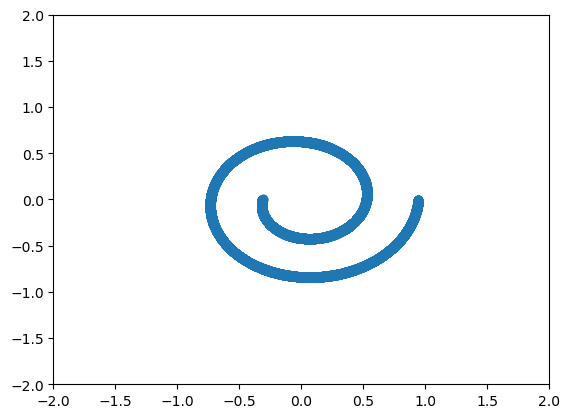

In [10]:
# re-enacting the paper

samples = 15000
data, _ = make_swiss_roll(samples)
data = data[:, [2, 0]] / 15
data = data*np.array([1, -1])
plt.scatter(data[:, 0], data[:, 1])
plt.xlim([-2, 2])
plt.ylim([-2, 2])

In [11]:
def forward(data, n, betas):
    for t in range(n):
        beta_t = betas[t]
        mean = data * torch.sqrt(1-beta_t)
        std =  torch.sqrt(beta_t)
        data = mean + torch.randn_like(data) * std
    return data

In [12]:
n = 50

#  we want mean to be close to 0 and std to be close to 1 (like the paper )
betas = torch.sigmoid(torch.linspace(-18, 10, n))* (3e-1 - 1e-5) + 1e-5
data_t = forward(torch.from_numpy(data), n, betas)


In [13]:
print(data_t.mean(0))
print(data_t.std(0))


tensor([0.0029, 0.0051], dtype=torch.float64)
tensor([0.9993, 1.0090], dtype=torch.float64)


(-2.0, 2.0)

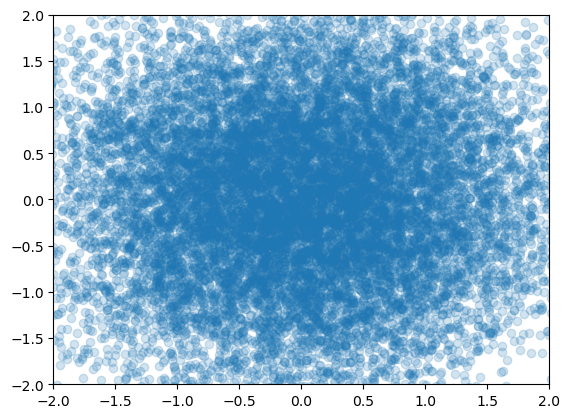

In [14]:
plt.scatter(data_t[:, 0].data.numpy(), data_t[:, 1].data.numpy(), alpha = .2)
plt.xlim([-2, 2])
plt.ylim([-2, 2])